In [1]:
import pandas as pd

customers = pd.read_csv("../data/customers.csv")
products = pd.read_csv("../data/products.csv")
stores = pd.read_csv("../data/stores.csv")
transactions = pd.read_csv("../data/transactions.csv")

customers.head(), products.head(), stores.head(), transactions.head()


(   customer_id       city        state  age gender
 0            1       Pune    Karnataka   57      M
 1            2  Hyderabad  Maharashtra   24      M
 2            3    Chennai  Maharashtra   49      M
 3            4       Pune  Maharashtra   36      M
 4            5  Bengaluru    Telangana   23      M,
    product_id    category    brand  unit_price
 0           1  Smartphone  Electra       38219
 1           2  Smartphone     Nova       49617
 2           3  Smartphone  Electra       27782
 3           4      Laptop   SmartX      116363
 4           5  Smartphone  TechPro       21431,
    store_id       city region
 0         1     Mumbai  North
 1         2  Hyderabad  South
 2         3      Delhi   East
 3         4  Hyderabad  North
 4         5     Mumbai  North,
    order_id  order_date  customer_id  product_id  store_id  quantity  \
 0         1  2023-02-21         2145          75         4         4   
 1         2  2023-07-28         1393          59         1      

In [2]:
df = (transactions
      .merge(products, on="product_id", how="left")
      .merge(customers, on="customer_id", how="left")
      .merge(stores, on="store_id", how="left"))

df["order_date"] = pd.to_datetime(df["order_date"])
df["year_month"] = df["order_date"].dt.to_period("M").astype(str)

df["revenue"] = df["quantity"] * df["selling_price"]

df.head()


,order_id,order_date,customer_id,product_id,store_id,quantity,discount_pct,category_x,selling_price,category_y,brand,unit_price,city_x,state,age,gender,city_y,region,year_month,revenue
0,1,2023-02-21,2145,75,4,4,0.05,Tablet,42445.05,Tablet,TechPro,44679,Delhi,Maharashtra,23,F,Hyderabad,North,2023-02,169780.20
1,2,2023-07-28,1393,59,1,1,0.05,Smartphone,35101.55,Smartphone,TechPro,36949,Ahmedabad,Maharashtra,31,M,Mumbai,North,2023-07,35101.55
2,3,2023-11-03,4885,73,16,2,0.00,Smartphone,54348.00,Smartphone,Zenith,54348,Kolkata,Maharashtra,36,F,Hyderabad,North,2023-11,108696.00
3,4,2023-05-11,858,22,7,4,0.00,Laptop,90919.00,Laptop,SmartX,90919,Bengaluru,West Bengal,30,F,Delhi,West,2023-05,363676.00
4,5,2023-09-27,4278,68,5,3,0.00,Smartphone,22531.00,Smartphone,Electra,22531,Hyderabad,Karnataka,34,M,Mumbai,North,2023-09,67593.00


In [6]:
df.columns


Index(['order_id', 'order_date', 'customer_id', 'product_id', 'store_id',
       'quantity', 'discount_pct', 'category_x', 'selling_price', 'category_y',
       'brand', 'unit_price', 'city_x', 'state', 'age', 'gender', 'city_y',
       'region', 'year_month', 'revenue'],
      dtype='object')

In [10]:
df = df.rename(columns={"category_x": "category"})

if "category_y" in df.columns:
    df = df.drop(columns=["category_y"])

df.columns


Index(['order_id', 'order_date', 'customer_id', 'product_id', 'store_id',
       'quantity', 'discount_pct', 'category', 'selling_price', 'brand',
       'unit_price', 'city_x', 'state', 'age', 'gender', 'city_y', 'region',
       'year_month', 'revenue'],
      dtype='object')

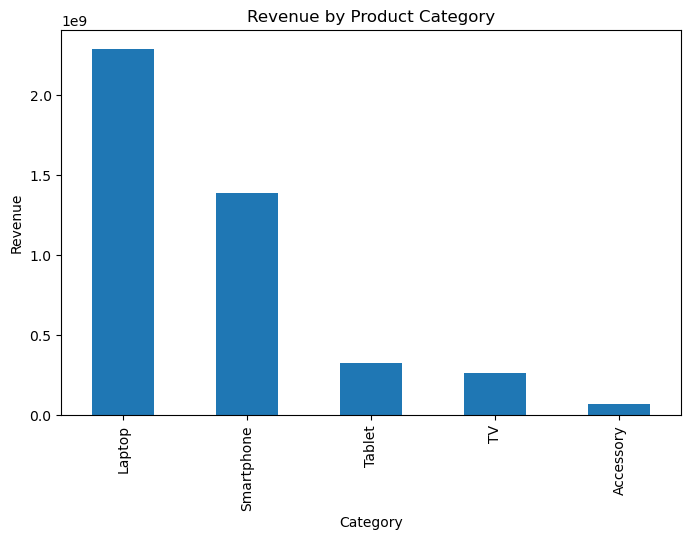

In [11]:
category_sales = df.groupby("category")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


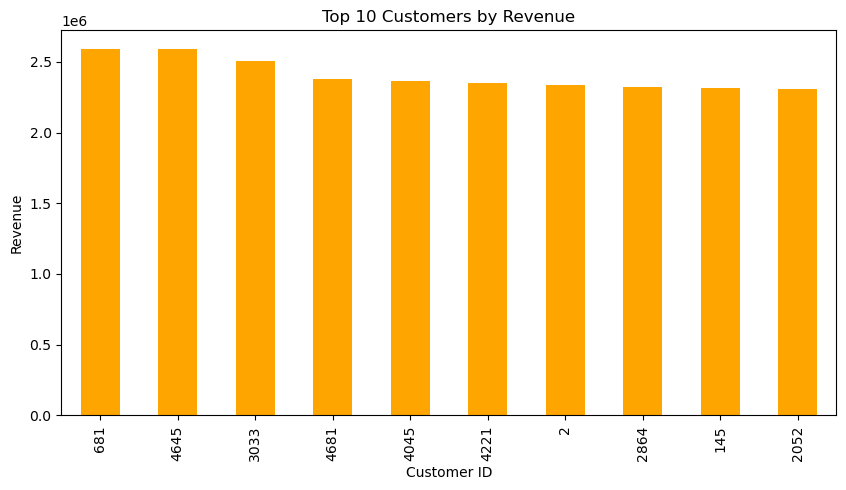

In [12]:
top_customers = df.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind="bar", color="orange")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()


/var/folders/q0/qm0slyx11s95qky0t33qh8hh0000gn/T/ipykernel_31637/3027038862.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rev = df.groupby("age_group")["revenue"].sum().sort_values(ascending=False)


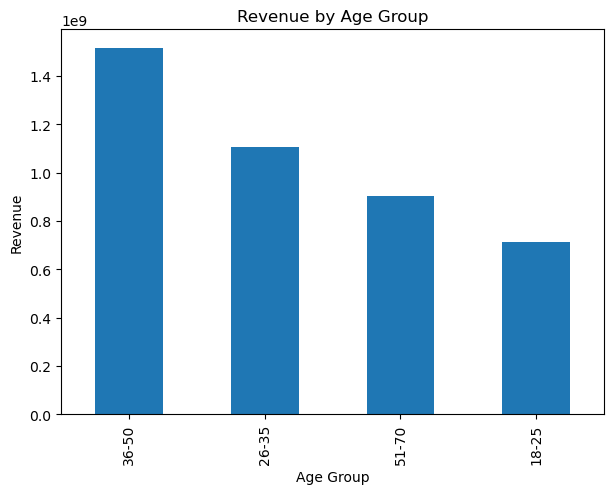

In [13]:
df["age_group"] = pd.cut(df["age"], bins=[18,25,35,50,70],
                         labels=["18-25","26-35","36-50","51-70"])

age_rev = df.groupby("age_group")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
age_rev.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.show()


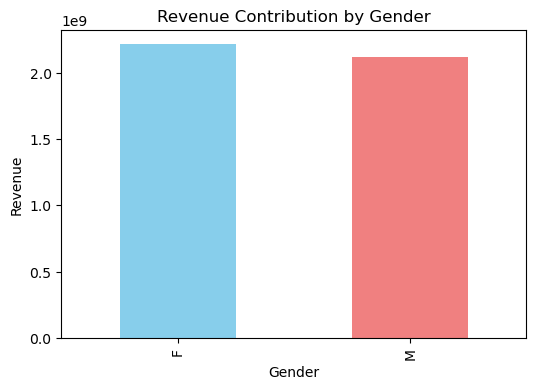

In [14]:
gender_rev = df.groupby("gender")["revenue"].sum()

plt.figure(figsize=(6,4))
gender_rev.plot(kind="bar", color=["skyblue","lightcoral"])
plt.title("Revenue Contribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.show()


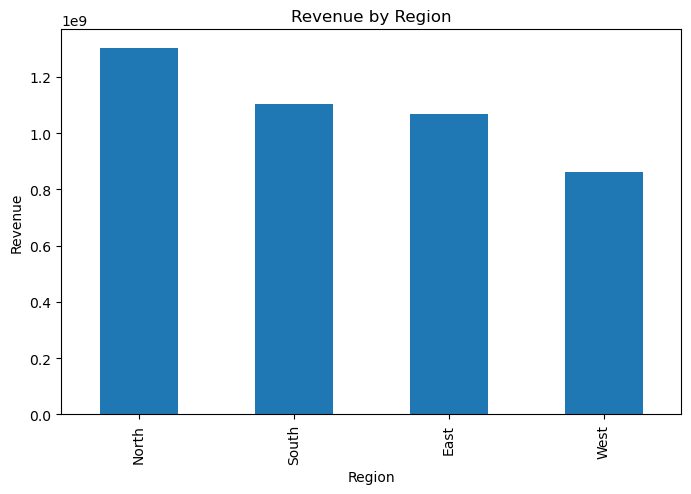

In [15]:
region_rev = df.groupby("region")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_rev.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


### Executive Insights Summary

| Area | Key Insight | Business Action |
|------|-------------|----------------|
| Product Performance | **Laptops** & **Smartphones** generate **70%+ of revenue** | Boost stock & marketing for these high performers |
| Customer Segments | Age group **36–50** spends the most | Target working professionals with loyalty offers |
| Gender Contribution | Males show slightly higher purchase value | Personalized campaigns to grow both segments |
| Geography | **West & North** regions lead in sales | Expand store presence & supply chain in these areas |
| Top Customers | Top **5% customers** drive majority of revenue | Launch premium membership & rewards program |
